### Perceptron from scratch

In [1]:
def summation(x,weights,bias):
    return np.dot(weights,x)+ bias
    
def sigmoid(net):
    return  1/(1+ np.exp(-net))


class Perceptron:
        
    def __init__(self,learning_rate,epoch):
        self.lr = learning_rate
        self.epoch = epoch
        self.weights = None
        self.bias =np.random.randn(1) 
        print("Initial bias = ",self.bias)
        self.learning_rate = 0.1   
        
    def fit(self,df):
        x = np.array(df[['x1','x2']])
        y = np.array(df['y'])
        no_of_samples,no_of_feautures = x.shape
        self.weights = np.linspace(0,2,no_of_feautures) # [0. 2.]
        print("Initial_weights = ",self.weights)
        loss_history = []
        
        for _ in range(self.epoch):            
            y_pred = []
            for index in range(no_of_samples): 
                net = summation(x[index],self.weights,self.bias)
                y_out = sigmoid(net)
                loss =  y[index]-y_out # error = (d-o)                 
                gradient_error = loss* y_out *(1-y_out)  # gradient error for unipolar(sigmoid) = (d-o)*o*(1-o)                
                self.weights += (self.lr * gradient_error * x[index])  # W = W + (lr * gradientError * imput_x ) 
                self.bias += self.lr * gradient_error   # b = b + (lr * gradientError) 
                y_pred = np.append(y_pred,y_out) 
            loss_history = np.append(loss_history,loss)
        return y_pred,loss,loss_history
    
    def prediction(self,y_pred):
        for i,r in df.iterrows():
            if y_pred[i]  > 0.5 :                
                print(f"{y_pred[i]}, Class 1") 
            elif y_pred[i] < 0.5:
                print(f"{y_pred[i]}, Class 0") 
                

if __name__ == "__main__":
    import numpy as np
    import pandas as pd
    
    f = pd.read_excel("XOR_truthtable.xlsx")
    df = pd.DataFrame(f)
    p = Perceptron(learning_rate=0.1,epoch=1000) 
    y_pred,loss,loss_history = p.fit(df)
    p.prediction(y_pred)
    

Initial bias =  [-0.52414873]
Initial_weights =  [0. 2.]
0.4978865582603162, Class 0
0.4966894197429963, Class 0
0.49540937690809533, Class 0
0.506775798492584, Class 1


1000


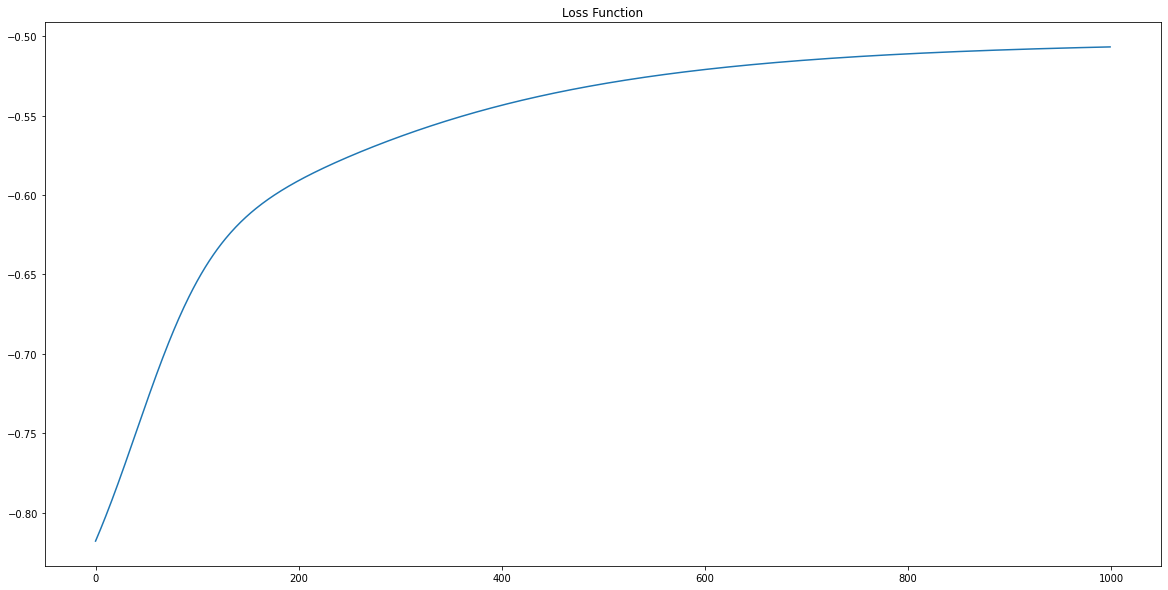

In [2]:
print(len(loss_history))

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
plt.plot(loss_history)
plt.title("Loss Function")
plt.show()